### 패키지 불러오기

In [ ]:
# 데이터 분석과 시각화를 위한 패키지 가져오기

import pandas as pd  # 데이터 처리와 분석을 위한 패키지
import numpy as np   # 수치 계산을 위한 패키지
import matplotlib.pyplot as plt  # 데이터 시각화를 위한 패키지
import seaborn as sns  # 통계적 데이터 시각화를 위한 패키지
import matplotlib.font_manager as fm  # 폰트 설정을 위한 패키지

# 나눔고딕 폰트 경로 설정 (한글 깨짐 방지를 위해)
!apt-get install -y fonts-nanum
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,723 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


### 데이터 불러오기

In [ ]:
df = pd.read_csv('/content/19_22_drunk.csv', encoding='euc-kr')

df.describe(include='all')

,사고다발지fid,사고다발지id,법정동코드,지점코드,시도시군구명,지점명,사고건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,다발지역폴리곤
count,6.470000e+02,6.470000e+02,6.470000e+02,6.470000e+02,647,647,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647
unique,NaN,NaN,NaN,NaN,398,563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,647
top,NaN,NaN,NaN,NaN,서울특별시 종로구1,울산광역시 북구 연암동(상방사거리 부근),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Polygon"",""coordinates"":[[[127.0240199..."
freq,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,6.802338e+06,2.022517e+06,3.093505e+09,3.093494e+07,NaN,NaN,3.168470,5.989181,0.071097,3.717156,2.055641,0.145286,127.470845,36.769221,NaN
std,1.214201e+04,4.835682e+02,1.324168e+09,1.324167e+07,NaN,NaN,0.495548,2.646022,0.268955,1.138436,2.017722,0.449188,0.853223,0.980106,NaN
min,6.789424e+06,2.022051e+06,1.111014e+09,1.111000e+07,NaN,NaN,3.000000,3.000000,0.000000,1.000000,0.000000,0.000000,126.276066,33.249291,NaN
25%,6.789586e+06,2.022051e+06,1.172511e+09,1.172500e+07,NaN,NaN,3.000000,4.000000,0.000000,3.000000,0.500000,0.000000,126.898879,35.870801,NaN
50%,6.792446e+06,2.022051e+06,3.114010e+09,3.114000e+07,NaN,NaN,3.000000,5.000000,0.000000,3.000000,2.000000,0.000000,127.067445,37.303440,NaN
75%,6.814856e+06,2.023018e+06,4.146311e+09,4.146300e+07,NaN,NaN,3.000000,7.000000,0.000000,4.000000,3.000000,0.000000,128.090496,37.505992,NaN


In [ ]:
# '시도시군구명'에서 '서울'을 포함한 데이터만 선택
df_seoul = df[df['시도시군구명'].str.contains('서울')]

# 결과 확인
print(df_seoul.head())

   사고다발지fid  사고다발지id       법정동코드      지점코드      시도시군구명  \
0   6789498  2022051  1111017500  11110001  서울특별시 종로구1   
1   6792429  2022051  1114014300  11140001   서울특별시 중구1   
2   6792345  2022051  1114016200  11140002   서울특별시 중구2   
3   6789599  2022051  1117012800  11170001  서울특별시 용산구1   
4   6789490  2022051  1120011400  11200001  서울특별시 성동구1   

                          지점명  사고건수  사상자수  사망자수  중상자수  경상자수  부상신고자수  \
0   서울특별시 종로구 숭인동(신설동역교차로 부근)     3     4     0     4     0       0   
1   서울특별시 중구 장충동1가(장충체육관앞 부근)     3     5     0     3     2       0   
2   서울특별시 중구 신당동(약수역서울3호선 부근)     3     5     0     3     2       0   
3  서울특별시 용산구 한강로3가(한강대교북측 부근)     3     9     0     4     5       0   
4    서울특별시 성동구 성수동1가(성수대교 부근)     4    12     0     7     5       0   

           경도         위도                                            다발지역폴리곤  
0  127.023122  37.575433  {"type":"Polygon","coordinates":[[[127.0240199...  
1  127.005786  37.559678  {"type":"Polygon","coordinates":[[[127.006

In [ ]:
# '다발지역폴리곤' 열의 데이터 삭제
df_seoul.drop(columns=['다발지역폴리곤'], inplace=True)

# 결과 확인
print(df_seoul.head())

   사고다발지fid  사고다발지id       법정동코드      지점코드      시도시군구명  \
0   6789498  2022051  1111017500  11110001  서울특별시 종로구1   
1   6792429  2022051  1114014300  11140001   서울특별시 중구1   
2   6792345  2022051  1114016200  11140002   서울특별시 중구2   
3   6789599  2022051  1117012800  11170001  서울특별시 용산구1   
4   6789490  2022051  1120011400  11200001  서울특별시 성동구1   

                          지점명  사고건수  사상자수  사망자수  중상자수  경상자수  부상신고자수  \
0   서울특별시 종로구 숭인동(신설동역교차로 부근)     3     4     0     4     0       0   
1   서울특별시 중구 장충동1가(장충체육관앞 부근)     3     5     0     3     2       0   
2   서울특별시 중구 신당동(약수역서울3호선 부근)     3     5     0     3     2       0   
3  서울특별시 용산구 한강로3가(한강대교북측 부근)     3     9     0     4     5       0   
4    서울특별시 성동구 성수동1가(성수대교 부근)     4    12     0     7     5       0   

           경도         위도  
0  127.023122  37.575433  
1  127.005786  37.559678  
2  127.010806  37.553750  
3  126.960990  37.522527  
4  127.036229  37.543578  


<ipython-input-4-d49ff705a81a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul.drop(columns=['다발지역폴리곤'], inplace=True)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

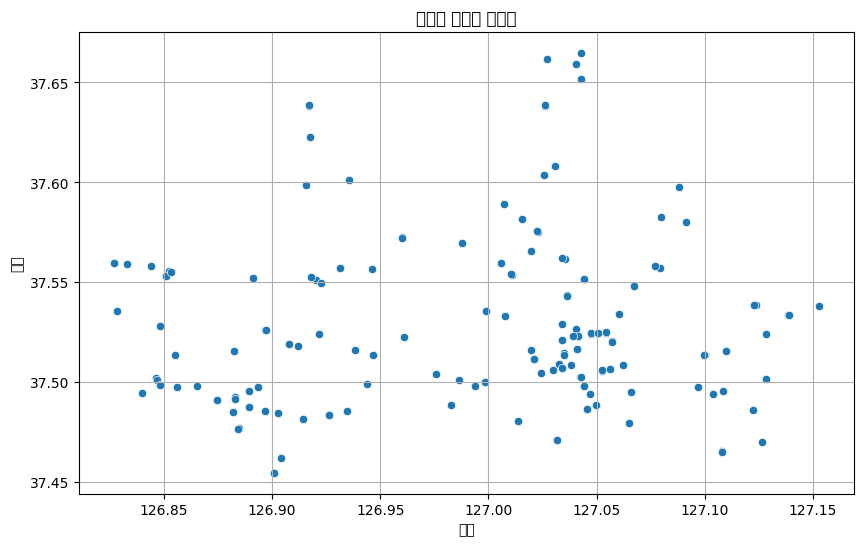

In [ ]:

# 경도와 위도 데이터 추출
longitude = df_seoul['경도']
latitude = df_seoul['위도']

# 산점도 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=longitude, y=latitude)
plt.title('경도와 위도의 산점도')
plt.xlabel('경도')
plt.ylabel('위도')
plt.grid(True)
plt.show()

# EDA 실행

한글 다 깨짐;;

In [ ]:
# 라이브러리 설치
!pip install ydata-profiling chardet

# 필요 라이브러리 임포트
import ydata_profiling as pp
import pandas as pd
import chardet
from google.colab import files

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 런타임 다시 실행

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq


Selecting previously unselected package fonts-nanum-coding.
(Reading database ... 121948 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔고딕 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rc('font', family='NanumGothic')


In [ ]:


# 프로파일 리포트 생성
report = pp.ProfileReport(df_seoul, title="EDA")

# 리포트 파일로 저장
report.to_file("report.html")


In [ ]:

# 파일 인코딩 자동 감지
with open("report.html", "rb") as file:
    raw_data = file.read()
    result = chardet.detect(raw_data)
    encoding = result['encoding']

# 파일 인코딩을 감지된 인코딩에서 UTF-8로 변경
with open("report.html", "r", encoding=encoding) as file:
    content = file.read()

with open("report_utf8.html", "w", encoding='utf-8') as file:
    file.write(content)


In [ ]:

# 생성된 리포트 파일 다운로드
files.download("report_utf8.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# clustering

여기서는 한글 출력됨

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-13-49f67c3a06ee>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul['Cluster'] = cluster_labels


   사고다발지fid  사고다발지id       법정동코드      지점코드      시도시군구명  \
0   6789498  2022051  1111017500  11110001  서울특별시 종로구1   
1   6792429  2022051  1114014300  11140001   서울특별시 중구1   
2   6792345  2022051  1114016200  11140002   서울특별시 중구2   
3   6789599  2022051  1117012800  11170001  서울특별시 용산구1   
4   6789490  2022051  1120011400  11200001  서울특별시 성동구1   

                          지점명  사고건수  사상자수  사망자수  중상자수  경상자수  부상신고자수  \
0   서울특별시 종로구 숭인동(신설동역교차로 부근)     3     4     0     4     0       0   
1   서울특별시 중구 장충동1가(장충체육관앞 부근)     3     5     0     3     2       0   
2   서울특별시 중구 신당동(약수역서울3호선 부근)     3     5     0     3     2       0   
3  서울특별시 용산구 한강로3가(한강대교북측 부근)     3     9     0     4     5       0   
4    서울특별시 성동구 성수동1가(성수대교 부근)     4    12     0     7     5       0   

           경도         위도  Cluster  
0  127.023122  37.575433        4  
1  127.005786  37.559678        2  
2  127.010806  37.553750        2  
3  126.960990  37.522527        3  
4  127.036229  37.543578        2  


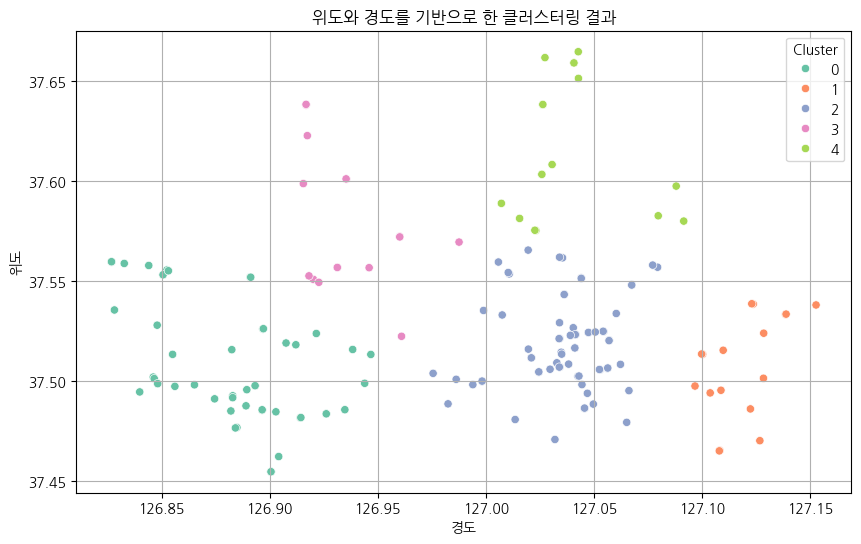

In [ ]:
from sklearn.cluster import KMeans

# 위도와 경도 데이터 추출
X = df_seoul[['위도', '경도']]

# K-means 모델 설정
kmeans = KMeans(n_clusters=5, random_state=0)

# 모델 피팅
kmeans.fit(X)

# 클러스터 레이블
cluster_labels = kmeans.labels_

# 클러스터링 결과를 데이터프레임에 추가
df_seoul['Cluster'] = cluster_labels

# 클러스터링 결과 확인
print(df_seoul.head())

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='경도', y='위도', hue='Cluster', data=df_seoul, palette='Set2', legend='full')
plt.title('위도와 경도를 기반으로 한 클러스터링 결과')
plt.xlabel('경도')
plt.ylabel('위도')
plt.grid(True)
plt.show()


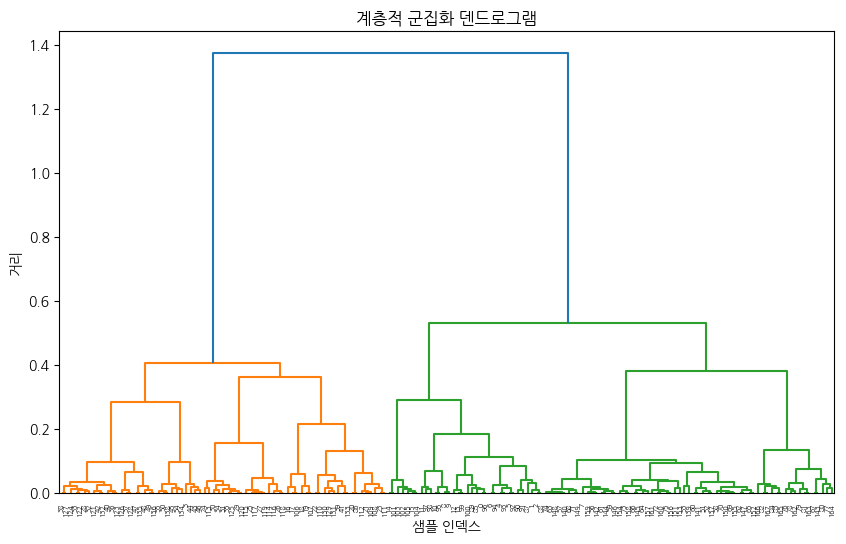

In [ ]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

# 위도와 경도 데이터 추출
X = df_seoul[['위도', '경도']]

# 덴드로그램 생성
plt.figure(figsize=(10, 6))
plt.title("계층적 군집화 덴드로그램")
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.xlabel('샘플 인덱스')
plt.ylabel('거리')
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


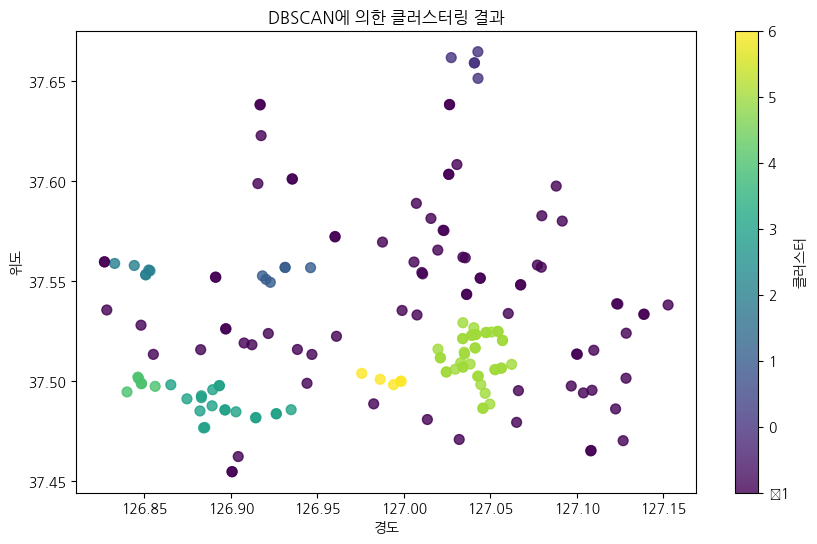

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# 경도와 위도 열 선택
X = df_seoul[['경도', '위도']]

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN 모델 생성 및 학습
dbscan = DBSCAN(eps=0.2, min_samples=5)  # eps와 min_samples는 적절히 조정 필요
clusters = dbscan.fit_predict(X_scaled)

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X['경도'], X['위도'], c=clusters, cmap='viridis', s=50, alpha=0.8)
plt.title('DBSCAN에 의한 클러스터링 결과')
plt.xlabel('경도')
plt.ylabel('위도')
plt.colorbar(label='클러스터')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


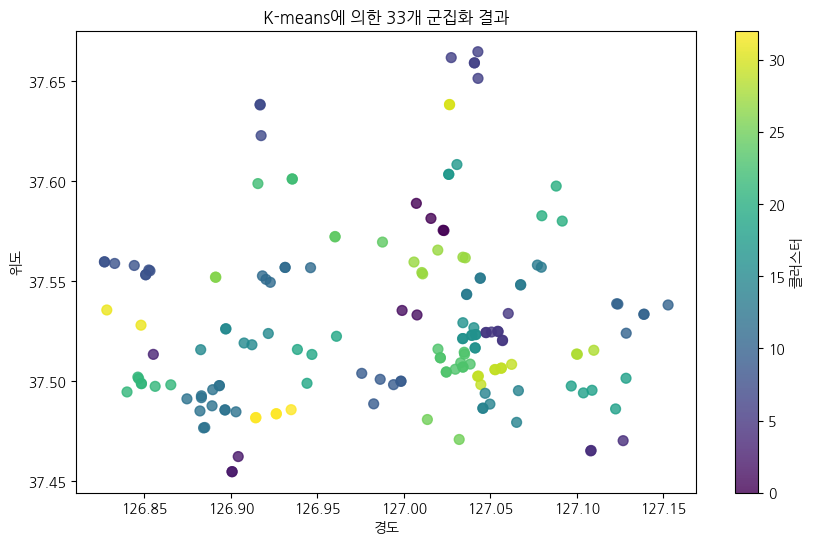

클러스터 0에 속하는 데이터 수: 4
     사고다발지fid  사고다발지id       법정동코드      지점코드       시도시군구명  \
0     6789498  2022051  1111017500  11110001   서울특별시 종로구1   
335   6814887  2023018  1111017500  11110001   서울특별시 종로구1   
346   6814970  2023018  1123010100  11230001  서울특별시 동대문구1   
350   6814957  2023018  1129010500  11290002   서울특별시 성북구2   

                             지점명  사고건수  사상자수  사망자수  중상자수  경상자수  부상신고자수  \
0      서울특별시 종로구 숭인동(신설동역교차로 부근)     3     4     0     4     0       0   
335      서울특별시 종로구 숭인동(동망봉터널 부근)     3     4     0     4     0       0   
346   서울특별시 동대문구 신설동(신설동역오거리 부근)     3     3     0     3     0       0   
350  서울특별시 성북구 동소문동2가(한성대입구역 부근)     3     6     0     3     3       0   

             경도         위도  Cluster  클러스터  
0    127.023122  37.575433        4     0  
335  127.015597  37.581496        4     0  
346  127.022656  37.575576        4     0  
350  127.007166  37.589032        4     0  


클러스터 1에 속하는 데이터 수: 2
     사고다발지fid  사고다발지id       법정동코드      지점코드      시도시군구명  \

<ipython-input-16-802dd03e4dab>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul['클러스터'] = clusters


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 경도와 위도 열 선택
X = df_seoul[['경도', '위도']]

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans 모델 생성 및 학습
k = 33  # 원하는 군집의 개수
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X['경도'], X['위도'], c=clusters, cmap='viridis', s=50, alpha=0.8)
plt.title(f'K-means에 의한 {k}개 군집화 결과')
plt.xlabel('경도')
plt.ylabel('위도')
plt.colorbar(label='클러스터')
plt.show()


# 클러스터 결과를 데이터프레임에 추가
df_seoul['클러스터'] = clusters

# 각 클러스터별 데이터 확인
for cluster_num in range(k):
    cluster_data = df_seoul[df_seoul['클러스터'] == cluster_num]
    print(f"클러스터 {cluster_num}에 속하는 데이터 수: {len(cluster_data)}")
    print(cluster_data.head())  # 각 클러스터에 속하는 처음 몇 개의 데이터 출력
    print("\n")


In [ ]:
pip install folium geopandas


In [ ]:
import folium
import pandas as pd

# 서울시 음주운전 사고 데이터 로드
# 여기서 'df_seoul'은 전처리된 데이터프레임을 가리킴
#df_seoul = pd.read_csv('/path/to/your/cleaned_data.csv', encoding='euc-kr')

# 지도 생성 (서울을 중심으로)
seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=12)

# 사고 데이터를 지도에 추가
for idx, row in df_seoul.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=row['지점명'],
        icon=folium.Icon(color='red')
    ).add_to(seoul_map)

# 지도 출력
seoul_map.save('seoul_drunk_accidents.html')
